# Capstone Project_GROUP 8_GAME RATING PREDICTOR MODEL

ALY6140- Submitted by Tuhena Sen

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline
nRowsRead = None # specify 'None' if want to read whole file
df2 = pd.read_csv('2020-08-19.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = '2020-08-19.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 19330 rows and 10 columns


**Step 1: Dataset Description and data loading**

Here, we are analysing the file '2020-08-19.csv' available at https://www.kaggle.com/jvanelteren/boardgamegeek-reviews
    
Every row represents a game and information related to it, such as, average rating, number of users rated, year etc.

In [3]:
df2.head()

,Unnamed: 0,ID,Name,Year,Rank,Average,Bayes average,Users rated,URL,Thumbnail
0,90,30549,Pandemic,2008,91,7.62,7.518,96186,/boardgame/30549/pandemic,https://cf.geekdo-images.com/micro/img/0m3-oqB...
1,172,822,Carcassonne,2000,173,7.42,7.311,96181,/boardgame/822/carcassonne,https://cf.geekdo-images.com/micro/img/z0tTaij...
2,380,13,Catan,1995,381,7.16,7.001,96171,/boardgame/13/catan,https://cf.geekdo-images.com/micro/img/e0y6Bog...
3,49,68448,7 Wonders,2010,50,7.76,7.662,79830,/boardgame/68448/7-wonders,https://cf.geekdo-images.com/micro/img/h-Ejv31...
4,87,36218,Dominion,2008,88,7.63,7.521,74933,/boardgame/36218/dominion,https://cf.geekdo-images.com/micro/img/VYp2s2f...


**Step2: Data Cleaning**

In [4]:
print("Rows before cleaning the data = " + str(len(df2)))

Rows before cleaning the data = 19330


In [5]:
#Dropping the rows having missing values and retaining only those games that have been rated by atleast 1 user
df2 = df2.dropna(axis=0)
df2 = df2[df2["Users rated"] > 0]
df2 = df2.drop(df2.columns[0], axis=1) #Dropping the first column as it is unneccessary
print("Rows after cleaning the data = " + str(len(df2)))

Rows after cleaning the data = 19317


In [6]:
df2.head()

,ID,Name,Year,Rank,Average,Bayes average,Users rated,URL,Thumbnail
0,30549,Pandemic,2008,91,7.62,7.518,96186,/boardgame/30549/pandemic,https://cf.geekdo-images.com/micro/img/0m3-oqB...
1,822,Carcassonne,2000,173,7.42,7.311,96181,/boardgame/822/carcassonne,https://cf.geekdo-images.com/micro/img/z0tTaij...
2,13,Catan,1995,381,7.16,7.001,96171,/boardgame/13/catan,https://cf.geekdo-images.com/micro/img/e0y6Bog...
3,68448,7 Wonders,2010,50,7.76,7.662,79830,/boardgame/68448/7-wonders,https://cf.geekdo-images.com/micro/img/h-Ejv31...
4,36218,Dominion,2008,88,7.63,7.521,74933,/boardgame/36218/dominion,https://cf.geekdo-images.com/micro/img/VYp2s2f...


**Step3: Data Analysis**

**CLUSTERING APPROACH**

Below graph shows the distribution of average rating of the game

/Users/tuhenasen/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Average', ylabel='Density'>

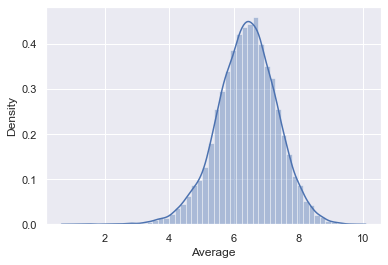

In [7]:
sns.set(color_codes="False")
sns.distplot(df2["Average"])

In [9]:
sd = df2["Average"].std()
mean = df2["Average"].mean()

print('Rating Standard Deviation = ' + str(sd) + '\n' + 'Rating Mean = ' + str(mean))

Rating Standard Deviation = 0.9304782337871004
Rating Mean = 6.39241341823261


**On observing the histogram and on calculating the mean, we can see that the games have a rating of around 6.4 on average**


Clustering the data using **K-Means** algorithm to find patterns


Dropping non-numeric columns so that we can calculate the mean and standard deviation of each row

In [10]:
df_numeric = df2.drop(['Name','ID','URL', 'Thumbnail'],axis=1)
df_numeric.head()

,Year,Rank,Average,Bayes average,Users rated
0,2008,91,7.62,7.518,96186
1,2000,173,7.42,7.311,96181
2,1995,381,7.16,7.001,96171
3,2010,50,7.76,7.662,79830
4,2008,88,7.63,7.521,74933


CPU times: user 3.32 s, sys: 41.9 ms, total: 3.36 s
Wall time: 2.1 s


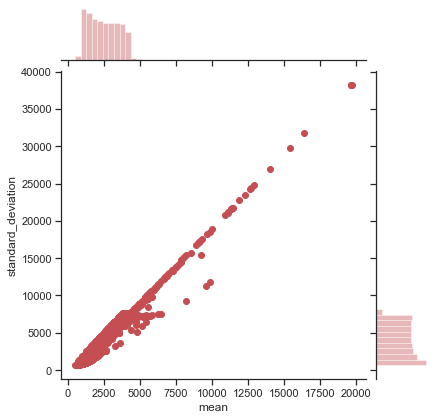

In [13]:
%%time
kmodel = KMeans(n_clusters=5, random_state=1) #Number of clusters is a hyperparamter that can be tuned for optimal performance

kmodel.fit(df_numeric)

games_mean = df_numeric.apply(np.mean, axis=1)
games_sd = df_numeric.apply(np.std, axis=1)

labels = kmodel.labels_
df_plot = pd.DataFrame()
df_plot["mean"] = games_mean
df_plot["standard_deviation"] = games_sd
sns.set_style(style="ticks")
sns.jointplot(x="mean", y="standard_deviation", data=df_plot, color="r")

**Observation - Most of the games have similar numeric attributes in the lower mean range. As the mean increases, mostly due to an increase in the number of user ratings, the number of games decreases. 
So, we see that very few games get reviewed or rated by a lot of users, maybe because most games don't get played much.
Also, I could not see any significant change in the cluster distribution on changing the number of clusters hyperparameter.**

Analyzing the correlation of attributes to average rating of the games

This will allow us to drop columns that are negatively correlated to the average rating

In [14]:
corr_df = df_numeric.corr()
print(type(corr_df))

corr_df["Average"]#Shows us how each column in our dataset is correlated with the average rating column

<class 'pandas.core.frame.DataFrame'>


Year             0.081731
Rank            -0.740501
Average          1.000000
Bayes average    0.485245
Users rated      0.172890
Name: Average, dtype: float64

Observation: We see that the attributes have a very low correlation with the average rating, so an approach like regression will not work out


**CLASSIFIER APPROACH**


**STEP 1 : Reading the data**

In [17]:

nRowsRead = None # specify 'None' if want to read whole file
df = pd.read_csv('bgg-15m-reviews.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = 'bgg-15m-reviews.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 15823269 rows and 6 columns


In [63]:
df.head()

,Unnamed: 0,user,rating,comment,ID,name
0,0,Torsten,10.0,NaN,30549,Pandemic
1,1,mitnachtKAUBO-I,10.0,Hands down my favorite new game of BGG CON 200...,30549,Pandemic
2,2,avlawn,10.0,I tend to either love or easily tire of co-op ...,30549,Pandemic
3,3,Mike Mayer,10.0,NaN,30549,Pandemic
4,4,Mease19,10.0,This is an amazing co-op game. I play mostly ...,30549,Pandemic


In [67]:
print("Rows before cleaning the data = " + str(len(df)))

Rows before cleaning the data = 15823269


In [68]:
#Shuffle the Dataset
df = df.sample(frac=1)
len(df)

15823269

**STEP2: DATA CLEANING OR HANDLING MISSING DATA**

In [26]:
%time
#Drop the rows where the "comment" column is empty
df.dropna(subset=['comment'], inplace=True)
len(df)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 33.1 µs


2995023

**STEP3: DATA ANALYSIS OR EDA**

**ANALYZING THE DISTRIBUTION OF RATING IN THE DATASET**



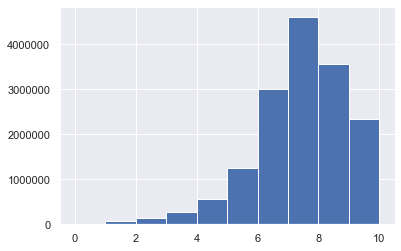

CPU times: user 539 ms, sys: 334 ms, total: 874 ms
Wall time: 1.06 s


In [69]:
%%time
plt.hist(df['rating'])
plt.show()

**OBSERVATION: The rating of value 7 has the highest frequency of almost 800k. The cummulative frequency of ratings 1, 2, and 3 is less than 100K.**

**STEP2 CONTINUES : MORE DATA CLEANING**

- removing emojis
- removing hyperlinks
- removing special characters

In [ ]:
#!pip install emoji
import emoji
import re
def clean_data(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  
    u"\U0001F300-\U0001F5FF"  
    u"\U0001F680-\U0001F6FF"  
    u"\U0001F1E0-\U0001F1FF"  
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    "]+", flags=re.UNICODE)
    text = re.sub(r'\n',' ', text) 
    text = re.sub('\s+', ' ', text).strip() 
    return emoji_pattern.sub(r'', text)
    return url.sub(r'',text)

In [ ]:

%%time
df['comment'] = df['comment'].apply(clean_data)

**STEP4: DATA PREPROCESSING**

Applying TF-IDF to remove stop words 

In [ ]:

from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
count_vectorizer = feature_extraction.text.TfidfVectorizer(stop_words='english')

**TOP 15 WORDS BEFORE REMOVING STOP WORDS**

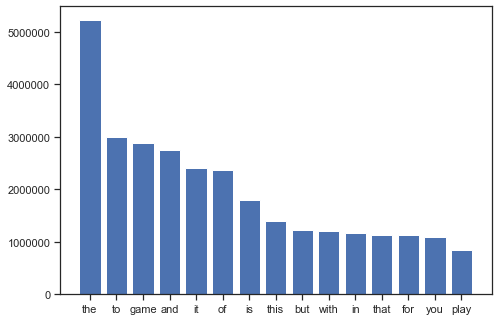

In [34]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['comment'], 15)

langs=[]
students=[]
for word, freq in common_words:
    langs.append(word)
    students.append(freq)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(langs,students)
plt.show()

**TOP 15 WORDS AFTER REMOVING STOP WORDS**

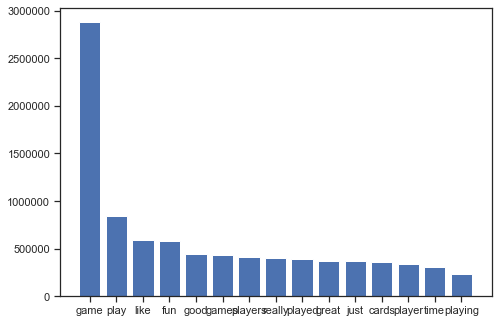

CPU times: user 2min 38s, sys: 5.04 s, total: 2min 43s
Wall time: 2min 46s


In [43]:
%%time
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['comment'], 15)
langs=[]
students=[]
for word, freq in common_words:
    langs.append(word)
    students.append(freq)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(langs,students)
plt.show()


In [44]:

#Store the reviews in X and the ratings i.e. the class labels in y
X = df['comment'].values
y = df['rating'].values

In [45]:
len(df['rating'].unique()) 

4384

**THE DATASET HAS 4384 UNIQUE VALUES**


In [46]:

#Rounding off the decimal ratings
y = np.round(y)
len(df['rating'].unique())

4384

**STEP5: DATA PREPERATION - SPLITTING THE DATA INTO TRAIN(80 PERCENT) AND TEST SET(20 PERCENT)**

In [47]:
from sklearn.model_selection import train_test_split

In [48]:

%%time
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

CPU times: user 1.2 s, sys: 1.16 s, total: 2.36 s
Wall time: 2.45 s


In [49]:
%%time
train_vectors = count_vectorizer.fit_transform(X_train)

CPU times: user 1min 3s, sys: 1.72 s, total: 1min 5s
Wall time: 1min 5s


In [50]:
%%time
test_vectors = count_vectorizer.transform(X_test)

CPU times: user 16.8 s, sys: 264 ms, total: 17.1 s
Wall time: 17.2 s


**STEP 6: RUNNING MACHINE LEARNING MODELS:**

**RIDGE CLASSIFIER**

**MULTINOMIAL NAIVE BAYES**

**LINEAR SVC**

**VOTING ENSEMBLE MODEL**

In [51]:
#Load the required libraries
import sklearn
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [52]:

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve

In [53]:
def range_accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i] or actual[i] == (predicted[i]+1) or actual[i] == (predicted[i]-1) :
            correct += 1
    return correct / float(len(actual)) * 100.0

**RIDGE CLASSIFIER**

In [54]:
%%time
clf = RidgeClassifier()
clf.fit(train_vectors, y_train)

CPU times: user 33min 47s, sys: 13.9 s, total: 34min 1s
Wall time: 8min 36s


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [55]:
%%time
y_pred = np.round(clf.predict(test_vectors))

CPU times: user 326 ms, sys: 155 ms, total: 481 ms
Wall time: 489 ms


In [56]:
%%time
acc = accuracy_score(np.round(y_pred), np.round(y_test))
print('Accuracy on Ridge Classifier : {} %'.format(acc))

Accuracy on Ridge Classifier : 0.32043138204188615 %
CPU times: user 65.5 ms, sys: 19 ms, total: 84.5 ms
Wall time: 86.1 ms


In [57]:

%%time
range_ridge_score=range_accuracy_metric(y_test, np.round(y_pred))
print('Range Accuracy on Ridge Classifier : {} %'.format(range_ridge_score))

Range Accuracy on Ridge Classifier : 69.59240740895318 %
CPU times: user 614 ms, sys: 7.34 ms, total: 621 ms
Wall time: 633 ms


In [58]:

mse1 = mean_squared_error(y_test, y_pred, squared=False)
mse1

1.647444233826571

In [59]:
%%time
print(metrics.classification_report(np.round(y_test), np.round(y_pred)))

/Users/tuhenasen/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.38      0.11      0.17      4604
         2.0       0.27      0.05      0.08      9043
         3.0       0.21      0.02      0.04     15932
         4.0       0.22      0.06      0.09     30013
         5.0       0.23      0.05      0.08     48661
         6.0       0.31      0.40      0.35    117964
         7.0       0.30      0.26      0.28    129714
         8.0       0.34      0.64      0.45    150118
         9.0       0.24      0.04      0.07     56008
        10.0       0.36      0.18      0.24     36947

    accuracy                           0.32    599005
   macro avg       0.26      0.16      0.17    599005
weighted avg       0.30      0.32      0.28    599005

CPU times: user 1.5 s, sys: 58 ms, total: 1.56 s
Wall time: 1.59 s


**Multinomial Naive Bayes Classifier**


In [70]:

%%time
clf2 = MultinomialNB()
clf2.fit(train_vectors, y_train)

CPU times: user 2.2 s, sys: 1.28 s, total: 3.48 s
Wall time: 4.88 s


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Predicting the values of the test set

In [72]:
%%time
y_pred_nb = np.round(clf2.predict(test_vectors))

CPU times: user 380 ms, sys: 288 ms, total: 667 ms
Wall time: 994 ms


In [73]:

acc2 = accuracy_score(y_pred_nb, np.round(y_test))
print(' Accuracy on Multinomial Naive Bayes : {} %'.format(acc2))

 Accuracy on Multinomial Naive Bayes : 0.30516606706120986 %


In [74]:
range_MNB_score=range_accuracy_metric(y_test, np.round(y_pred_nb))
print('Range Accuracy on Multinomial Naive Bayes : {} %'.format(range_MNB_score))

Range Accuracy on Multinomial Naive Bayes : 66.40395322242719 %


In [75]:
mse2 = mean_squared_error(y_test, np.round(y_pred_nb), squared=False)
mse2

1.7331848863681967

In [76]:
print(metrics.classification_report(np.round(y_test), np.round(y_pred_nb)))

/Users/tuhenasen/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.50      0.00      0.00      4604
         2.0       0.05      0.00      0.00      9043
         3.0       0.26      0.00      0.00     15932
         4.0       0.37      0.00      0.01     30013
         5.0       0.23      0.00      0.01     48661
         6.0       0.29      0.32      0.31    117964
         7.0       0.30      0.15      0.20    129714
         8.0       0.31      0.83      0.45    150118
         9.0       0.20      0.00      0.01     56008
        10.0       0.39      0.01      0.02     36947

    accuracy                           0.31    599005
   macro avg       0.26      0.12      0.09    599005
weighted avg       0.29      0.31      0.22    599005



**LINEAR SVC**

FIT LINEAR SVC MODEL ON TRAIN DATASET

In [77]:
%%time
clf3 = LinearSVC()
clf3.fit(train_vectors, y_train)

CPU times: user 10min 50s, sys: 3.45 s, total: 10min 54s
Wall time: 10min 58s


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

PREDICT THE VALUES ON TEST DATASET

In [79]:
%%time
y_pred_svc = np.round(clf3.predict(test_vectors))

CPU times: user 255 ms, sys: 12.8 ms, total: 267 ms
Wall time: 269 ms


In [80]:
acc3 = accuracy_score(y_pred_svc, np.round(y_test))
print('Accuracy on Linear SVC : {} %'.format(acc3))

Accuracy on Linear SVC : 0.320847071393394 %


In [81]:
range_svc_score=range_accuracy_metric(y_test, np.round(y_pred_svc))
print('Range Accuracy on Linear SVC : {} %'.format(range_svc_score))

Range Accuracy on Linear SVC : 69.63364245707466 %


In [82]:
mse3 = mean_squared_error(y_test, np.round(y_pred_svc), squared=False)
mse3

1.6473013454911858

In [83]:
print(metrics.classification_report(np.round(y_test), np.round(y_pred_svc)))

/Users/tuhenasen/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.32      0.19      0.24      4604
         2.0       0.25      0.07      0.11      9043
         3.0       0.20      0.04      0.06     15932
         4.0       0.22      0.07      0.10     30013
         5.0       0.22      0.06      0.09     48661
         6.0       0.31      0.40      0.35    117964
         7.0       0.30      0.26      0.28    129714
         8.0       0.35      0.62      0.45    150118
         9.0       0.23      0.05      0.08     56008
        10.0       0.36      0.22      0.28     36947

    accuracy                           0.32    599005
   macro avg       0.25      0.18      0.18    599005
weighted avg       0.30      0.32      0.28    599005



**VOTING ENSEMBLE CLASSIFIER**

FIT THE ENSEMBLE MODEL ON TRAIN DATASET

In [84]:
%%time
from sklearn.ensemble import VotingClassifier
estimators = []
estimators.append(('ridge', clf))
estimators.append(('MNB', clf2))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(train_vectors, y_train)

CPU times: user 36min 42s, sys: 23.8 s, total: 37min 6s
Wall time: 9min 40s


VotingClassifier(estimators=[('ridge',
                              RidgeClassifier(alpha=1.0, class_weight=None,
                                              copy_X=True, fit_intercept=True,
                                              max_iter=None, normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001)),
                             ('MNB',
                              MultinomialNB(alpha=1.0, class_prior=None,
                                            fit_prior=True))],
                 flatten_transform=True, n_jobs=None, voting='hard',
                 weights=None)

In [85]:
y_pred_ensemble = np.round(ensemble.predict(test_vectors))

In [86]:
acc4 = accuracy_score(y_pred_ensemble, np.round(y_test))
print(' Accuracy on Ensemble model : {} %'.format(acc4))

 Accuracy on Ensemble model : 0.3169405931503076 %


In [87]:
range_ensemble_score=range_accuracy_metric(y_test, np.round(y_pred_ensemble))
print('Range Accuracy on Ensemble model : {} %'.format(range_ensemble_score))

Range Accuracy on Ensemble model : 69.41811837964624 %


In [88]:
mse4 = mean_squared_error(y_test, y_pred_ensemble, squared=False)
mse4

1.6121098513448864

In [89]:
print(metrics.classification_report(np.round(y_test), np.round(y_pred_ensemble)))

/Users/tuhenasen/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.37      0.11      0.17      4604
         2.0       0.27      0.05      0.08      9043
         3.0       0.20      0.02      0.04     15932
         4.0       0.22      0.06      0.09     30013
         5.0       0.23      0.05      0.08     48661
         6.0       0.30      0.42      0.35    117964
         7.0       0.30      0.26      0.28    129714
         8.0       0.34      0.67      0.45    150118
         9.0       0.27      0.00      0.00     56008
        10.0       0.56      0.01      0.01     36947

    accuracy                           0.32    599005
   macro avg       0.28      0.15      0.14    599005
weighted avg       0.31      0.32      0.26    599005



**STEP 7: COMPARING THE MODELS TO FIND OUT THE BEST FIT**

**ACCURACY AND RANGE ACCURACY**

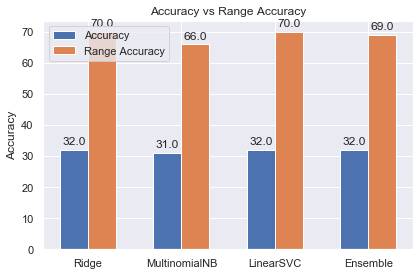

In [90]:
labels = ['Ridge', 'MultinomialNB', 'LinearSVC', 'Ensemble']
accuracy = np.round([acc*100, acc2*100, acc3*100, acc4*100])
range_accuracy = np.round([range_ridge_score, range_MNB_score, range_svc_score, range_ensemble_score])

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy, width, label='Accuracy')
rects2 = ax.bar(x + width/2, range_accuracy, width, label='Range Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs Range Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

**I will choose the Ridge Classifier model as the best out of these ones as linear classifiers such as ridge or linear SVC work quite well on text classification problems. This is because text classification problems contain many features and high dimensional problems are likely to be linearly separable. Ensemble has low MSE (means low error) but accuracy score is low which is better for ridge.**

**Hence, I will choose Ridge classifier over all other models as it also avoids overfitting by regularizing the weights to keep them small, and model selection is straight forward as we only have to choose the value of a single regression parameter.**
